In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import math
import json
import fileinput
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

pd.set_option('display.max_columns', None)

In [35]:
dir = '../rna_phix/output/'
files = os.listdir(dir)
files = [dir+i for i in files if '.json' in i and 'adapter' not in i and 'skewer' not in i]
files

['../rna_phix/output/SRR11861905_ntrimmer_Log.final.out.json',
 '../rna_phix/output/SRR11861905_seqscreener_rrna_Log.final.out.json',
 '../rna_phix/output/SRR6048806_ntrimmer_Log.final.out.json',
 '../rna_phix/output/SRR6048806_deduper_Log.final.out.json',
 '../rna_phix/output/SRR6048806_polyatrim_Log.final.out.json',
 '../rna_phix/output/SRR11861905_seqscreener_phix_Log.final.out.json',
 '../rna_phix/output/SRR11861905_none_Log.final.out.json',
 '../rna_phix/output/SRR11861905_polyatrim_Log.final.out.json',
 '../rna_phix/output/SRR11861905_qtrimmer_Log.final.out.json',
 '../rna_phix/output/SRR6048806_none_Log.final.out.json',
 '../rna_phix/output/SRR6048806_seqscreener_rrna_Log.final.out.json',
 '../rna_phix/output/SRR11861905_lengthfilter_Log.final.out.json',
 '../rna_phix/output/SRR11861905_deduper_Log.final.out.json',
 '../rna_phix/output/SRR6048806_seqscreener_phix_Log.final.out.json',
 '../rna_phix/output/SRR11861905_std_Log.final.out.json',
 '../rna_phix/output/SRR6048806_std_Lo

In [36]:
file = files[0]
with open(file,'r',encoding='utf-8-sig') as f:
        d = json.load(f)
        cols = [i for i in d.keys()]
        print(cols)
        df = pd.DataFrame(columns = cols + ['filename'])


for file in files:
    #clean_file(file)
    with open(file) as f:
        d = json.load(f)
        for i in d.keys():
            if '%' in i:
                d[i] = float(d[i].replace('%',''))
        for i in d.keys():
            if 'Number' in i or 'number' in i:
                d[i] = int(d[i])
        cols = [i for i in d.keys()]
        d['filename'] = file
        job_type_int = d['filename'].split('/')[-1].split('_')[1:]
        
        d['job_type'] = "".join(job_type_int).replace('Log.final.out.json','')
        d['dataset'] = d['filename'].split('/')[-1].split('_')[0]

        df = df.append(d, ignore_index=True)
        
df

        

['Started job on ', 'Started mapping on ', 'Finished on ', 'Mapping speed, Million of reads per hour ', 'Number of input reads ', 'Average input read length ', 'Uniquely mapped reads number ', 'Uniquely mapped reads % ', 'Average mapped length ', 'Number of splices: Total ', 'Number of splices: Annotated (sjdb) ', 'Number of splices: GT/AG ', 'Number of splices: GC/AG ', 'Number of splices: AT/AC ', 'Number of splices: Non-canonical ', 'Mismatch rate per base, % ', 'Deletion rate per base ', 'Deletion average length ', 'Insertion rate per base ', 'Insertion average length ', 'Number of reads mapped to multiple loci ', '% of reads mapped to multiple loci ', 'Number of reads mapped to too many loci ', '% of reads mapped to too many loci ', '% of reads unmapped: too many mismatches ', '% of reads unmapped: too short ', '% of reads unmapped: other ', 'Number of chimeric reads ', '% of chimeric reads ']


,Started job on,Started mapping on,Finished on,"Mapping speed, Million of reads per hour",Number of input reads,Average input read length,Uniquely mapped reads number,Uniquely mapped reads %,Average mapped length,Number of splices: Total,Number of splices: Annotated (sjdb),Number of splices: GT/AG,Number of splices: GC/AG,Number of splices: AT/AC,Number of splices: Non-canonical,"Mismatch rate per base, %",Deletion rate per base,Deletion average length,Insertion rate per base,Insertion average length,Number of reads mapped to multiple loci,% of reads mapped to multiple loci,Number of reads mapped to too many loci,% of reads mapped to too many loci,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,Number of chimeric reads,% of chimeric reads,filename,dataset,job_type
0,Aug 03 145923,Aug 03 150352,Aug 03 153620,51.38,27803269,281,26639964,95.82,279.90,25086598,24815615,24874077,158777,21147,32597,0.21,0.01%,1.73,0.01%,1.70,609404,2.19,5538,0.02,0.0,1.95,0.02,0,0.0,../rna_phix/output/SRR11861905_ntrimmer_Log.fi...,SRR11861905,ntrimmer
1,Aug 03 150109,Aug 03 150352,Aug 03 152722,70.99,27803269,281,26644542,95.83,279.98,25097154,24826035,24884556,158838,21151,32609,0.21,0.01%,1.73,0.01%,1.70,609495,2.19,5533,0.02,0.0,1.94,0.02,0,0.0,../rna_phix/output/SRR11861905_seqscreener_rrn...,SRR11861905,seqscreenerrrna
2,Aug 03 150449,Aug 03 150548,Aug 03 151851,71.95,15649800,249,14446600,92.31,248.22,10566528,10470776,10471488,73062,7842,14136,0.39,0.01%,1.68,0.01%,1.50,307772,1.97,1668,0.01,0.0,5.69,0.02,0,0.0,../rna_phix/output/SRR6048806_ntrimmer_Log.fin...,SRR6048806,ntrimmer
3,Aug 03 150157,Aug 03 151155,Aug 03 154415,13.14,7080828,250,6576357,92.88,248.61,4739679,4692856,4693856,35230,3841,6752,0.39,0.01%,1.71,0.01%,1.51,134273,1.90,802,0.01,0.0,5.20,0.02,0,0.0,../rna_phix/output/SRR6048806_deduper_Log.fina...,SRR6048806,deduper
4,Aug 03 150449,Aug 03 150547,Aug 03 151856,71.41,15649800,249,14426752,92.18,248.56,10554250,10458628,10459360,72978,7824,14088,0.39,0.01%,1.68,0.01%,1.50,306924,1.96,1652,0.01,0.0,5.83,0.02,0,0.0,../rna_phix/output/SRR6048806_polyatrim_Log.fi...,SRR6048806,polyatrim
5,Aug 03 150109,Aug 03 150352,Aug 03 152726,70.78,27801006,281,26644540,95.84,279.98,25097154,24826035,24884556,158838,21151,32609,0.21,0.01%,1.73,0.01%,1.70,609494,2.19,5533,0.02,0.0,1.93,0.02,0,0.0,../rna_phix/output/SRR11861905_seqscreener_phi...,SRR11861905,seqscreenerphix
6,Aug 03 145923,Aug 03 150352,Aug 03 153557,52.00,27803269,281,26644542,95.83,279.98,25097154,24826035,24884556,158838,21151,32609,0.21,0.01%,1.73,0.01%,1.70,609495,2.19,5533,0.02,0.0,1.94,0.02,0,0.0,../rna_phix/output/SRR11861905_none_Log.final....,SRR11861905,none
7,Aug 03 145958,Aug 03 150400,Aug 03 153102,61.71,27803269,281,26634996,95.80,279.98,25091931,24820859,24879446,158732,21149,32604,0.21,0.01%,1.73,0.01%,1.70,608610,2.19,5525,0.02,0.0,1.97,0.02,0,0.0,../rna_phix/output/SRR11861905_polyatrim_Log.f...,SRR11861905,polyatrim
8,Aug 03 145958,Aug 03 150400,Aug 03 153115,61.22,27803269,281,26611869,95.71,280.00,25072899,24801977,24860471,158693,21127,32608,0.21,0.01%,1.73,0.01%,1.70,608670,2.19,5542,0.02,0.0,2.06,0.02,0,0.0,../rna_phix/output/SRR11861905_qtrimmer_Log.fi...,SRR11861905,qtrimmer
9,Aug 03 150450,Aug 03 151204,Aug 03 152601,67.31,15649800,250,14426960,92.19,248.59,10555292,10459644,10460368,72994,7824,14106,0.39,0.01%,1.68,0.01%,1.50,306800,1.96,1652,0.01,0.0,5.83,0.02,0,0.0,../rna_phix/output/SRR6048806_none_Log.final.o...,SRR6048806,none


In [37]:
#df['Uniquely mapped reads number'] = \ 
#    df['Uniquely mapped reads number'].str.rstrip('%').astype('float') / 100.0



# a4_dims = (15.7, 15.27)
# fig, ax = plt.subplots(figsize=a4_dims)


# #df['Mismatch rate per base, % '] = df['Mismatch rate per base, % '].replace('%','', regex=True).astype(float)
# #df['% of reads unmapped: too many mismatches '] = df['% of reads unmapped: too many mismatches '].replace('%','', regex=True).astype(float)


# sns.scatterplot(x="Mismatch rate per base, % ", y="Uniquely mapped reads % ",
#                 hue="job_type", size='Number of input reads ',
#                 #palette="ch:r=-.2,d=.3_r",
#                 #hue_order=clarity_ranking,
#                 sizes=(10, 80), linewidth=20,
#                 data=df, legend='brief')

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,)

#g._legend.remove()
#g

In [38]:
# sns.scatterplot(x="Number of input reads ", y="Uniquely mapped reads number ",
#                 hue="job_type", size="Number of input reads ", 
#                 #palette="ch:r=-.2,d=.3_r",
#                 #hue_order=clarity_ranking,
#                 sizes=(30, 40), linewidth=20,
#                 data=df, legend='brief')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

,Started job on,Started mapping on,Finished on,"Mapping speed, Million of reads per hour",Number of input reads,Average input read length,Uniquely mapped reads number,Uniquely mapped reads %,Average mapped length,Number of splices: Total,Number of splices: Annotated (sjdb),Number of splices: GT/AG,Number of splices: GC/AG,Number of splices: AT/AC,Number of splices: Non-canonical,"Mismatch rate per base, %",Deletion rate per base,Deletion average length,Insertion rate per base,Insertion average length,Number of reads mapped to multiple loci,% of reads mapped to multiple loci,Number of reads mapped to too many loci,% of reads mapped to too many loci,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,Number of chimeric reads,% of chimeric reads,filename,dataset,job_type
0,Aug 03 145923,Aug 03 150352,Aug 03 153620,51.38,27803269,281,26639964,95.82,279.90,25086598,24815615,24874077,158777,21147,32597,0.21,0.01%,1.73,0.01%,1.70,609404,2.19,5538,0.02,0.0,1.95,0.02,0,0.0,../rna_phix/output/SRR11861905_ntrimmer_Log.fi...,SRR11861905,ntrimmer
1,Aug 03 150109,Aug 03 150352,Aug 03 152722,70.99,27803269,281,26644542,95.83,279.98,25097154,24826035,24884556,158838,21151,32609,0.21,0.01%,1.73,0.01%,1.70,609495,2.19,5533,0.02,0.0,1.94,0.02,0,0.0,../rna_phix/output/SRR11861905_seqscreener_rrn...,SRR11861905,seqscreenerrrna
5,Aug 03 150109,Aug 03 150352,Aug 03 152726,70.78,27801006,281,26644540,95.84,279.98,25097154,24826035,24884556,158838,21151,32609,0.21,0.01%,1.73,0.01%,1.70,609494,2.19,5533,0.02,0.0,1.93,0.02,0,0.0,../rna_phix/output/SRR11861905_seqscreener_phi...,SRR11861905,seqscreenerphix
6,Aug 03 145923,Aug 03 150352,Aug 03 153557,52.00,27803269,281,26644542,95.83,279.98,25097154,24826035,24884556,158838,21151,32609,0.21,0.01%,1.73,0.01%,1.70,609495,2.19,5533,0.02,0.0,1.94,0.02,0,0.0,../rna_phix/output/SRR11861905_none_Log.final....,SRR11861905,none
7,Aug 03 145958,Aug 03 150400,Aug 03 153102,61.71,27803269,281,26634996,95.80,279.98,25091931,24820859,24879446,158732,21149,32604,0.21,0.01%,1.73,0.01%,1.70,608610,2.19,5525,0.02,0.0,1.97,0.02,0,0.0,../rna_phix/output/SRR11861905_polyatrim_Log.f...,SRR11861905,polyatrim
8,Aug 03 145958,Aug 03 150400,Aug 03 153115,61.22,27803269,281,26611869,95.71,280.00,25072899,24801977,24860471,158693,21127,32608,0.21,0.01%,1.73,0.01%,1.70,608670,2.19,5542,0.02,0.0,2.06,0.02,0,0.0,../rna_phix/output/SRR11861905_qtrimmer_Log.fi...,SRR11861905,qtrimmer
11,Aug 03 145859,Aug 03 150543,Aug 03 155608,33.09,27803269,281,26644542,95.83,279.98,25097154,24826035,24884556,158838,21151,32609,0.21,0.01%,1.73,0.01%,1.70,609495,2.19,5533,0.02,0.0,1.94,0.02,0,0.0,../rna_phix/output/SRR11861905_lengthfilter_Lo...,SRR11861905,lengthfilter
12,Aug 03 145827,Aug 03 150543,Aug 03 155124,24.80,18882045,280,18139761,96.07,279.00,17991782,17777955,17826875,122677,16636,25594,0.21,0.01%,1.85,0.01%,1.73,366877,1.94,4296,0.02,0.0,1.94,0.02,0,0.0,../rna_phix/output/SRR11861905_deduper_Log.fin...,SRR11861905,deduper
14,Aug 03 150207,Aug 03 150352,Aug 03 152110,65.47,18876202,279,18401472,97.49,279.34,18233994,18015074,18065779,124849,16918,26448,0.17,0.01%,1.85,0.01%,1.73,366966,1.94,4238,0.02,0.0,0.53,0.02,0,0.0,../rna_phix/output/SRR11861905_std_Log.final.o...,SRR11861905,std


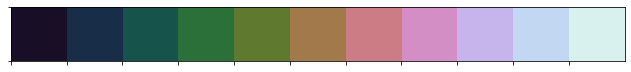

In [55]:
cmap = sns.palplot(sns.color_palette("cubehelix", 11))
cmap
cmap = sns.color_palette("cubehelix", 11)

df_1 = df[df['dataset']=="SRR11861905"]
df_1


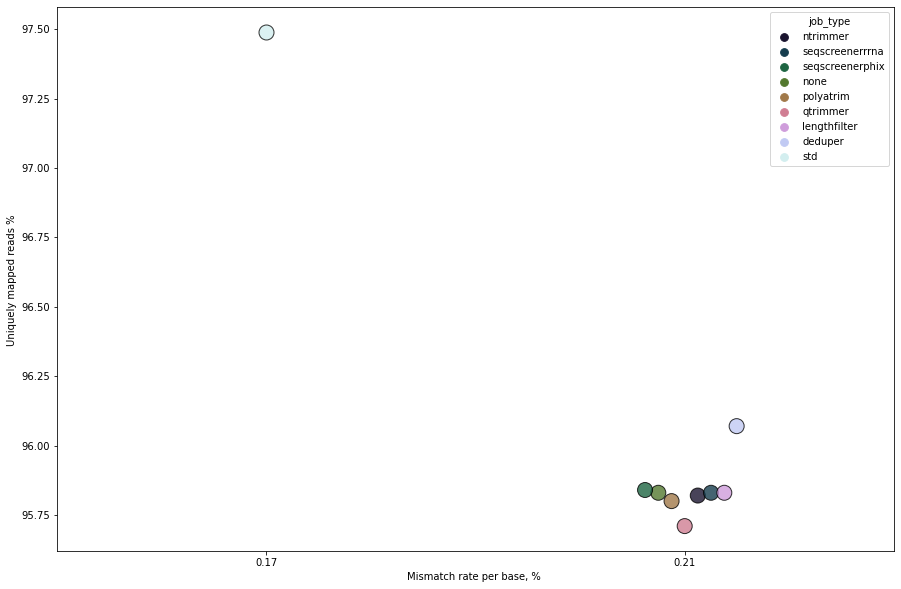

In [54]:
fig, ax = plt.subplots(figsize=(19,4.8))
sns.swarmplot(data=df_1, x="Mismatch rate per base, % ", y="Uniquely mapped reads % ", 
                   edgecolor="black",alpha=.8, s=15,linewidth=1.0, ax=ax, hue="job_type",palette="cubehelix")

sns.set_palette(cmap)
fig.set_size_inches(15,10)
plt.show()

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

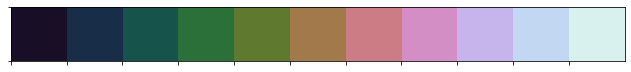

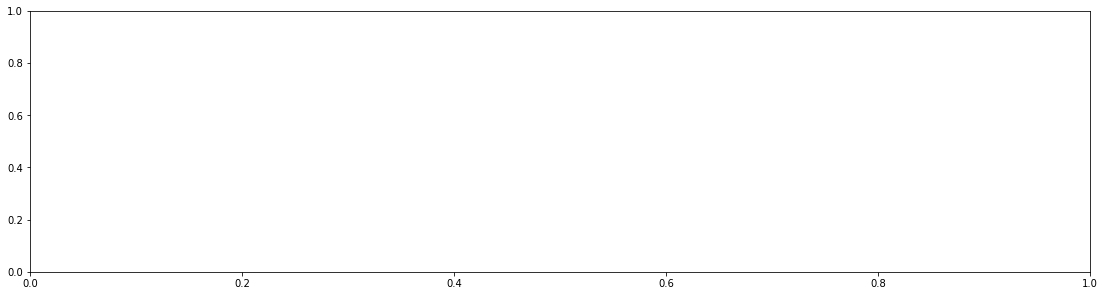

In [53]:
cmap = sns.palplot(sns.color_palette("cubehelix", 11))
cmap
cmap = sns.color_palette("cubehelix", 11)


fig, ax = plt.subplots(figsize=(19,4.8))
sns.swarmplot(data=df, x="Mismatch rate per base, % ", y="Uniquely mapped reads % ", 
                   edgecolor="black",alpha=.8, size="Number of input reads ",linewidth=1.0, ax=ax, hue="job_type",palette="cubehelix")

sns.set_palette(cmap)
fig.set_size_inches(15,10)
plt.show()